importing libraries

In [87]:
import tensorflow as tf
import numpy as np
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
import sys

dataset generation

In [102]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [103]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [104]:
#y_test = keras.utils.to_categorical(y_test)
#y_train = keras.utils.to_categorical(y_train)

In [105]:
x_train.shape,y_train.shape

((60000, 28, 28, 1), (60000,))

#Model

In [106]:
import tensorflow as tf
from tensorflow.keras import layers, models


#84,32,132,
#64,118

# Build the CNN model
model = tf.keras.models.Sequential()

# Layer 1: Convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
model.add(layers.Conv2D(84, (3, 3), activation='relu', input_shape=(28, 28, 1)))


# Layer 2: Convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

# Layer 3: Convolutional layer with 128 filters, 3x3 kernel size, and ReLU activation
model.add(layers.Conv2D(132, (3, 3), activation='relu'))

# Layer 4: Convolutional layer with 128 filters, 3x3 kernel size, and ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Layer 5: Convolutional layer with 128 filters, 3x3 kernel size, and ReLU activation
model.add(layers.Conv2D(118, (3, 3), activation='relu'))


# Flatten the output for the fully connected layers
model.add(layers.Flatten())


# Layer 5: Output layer with 10 neurons (for 10 classes in MNIST) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Train the model
#model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 26, 26, 84)        840       
                                                                 
 conv2d_61 (Conv2D)          (None, 24, 24, 32)        24224     
                                                                 
 conv2d_62 (Conv2D)          (None, 22, 22, 132)       38148     
                                                                 
 conv2d_63 (Conv2D)          (None, 20, 20, 64)        76096     
                                                                 
 conv2d_64 (Conv2D)          (None, 18, 18, 118)       68086     
                                                                 
 flatten_12 (Flatten)        (None, 38232)             0         
                                                                 
 dense_12 (Dense)            (None, 10)              

In [107]:
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])

Training

In [108]:
model.fit(x_train,y_train, epochs=2, batch_size=16)

Epoch 1/2
3750/3750 [==============================] - 22s 5ms/step - loss: 0.1102 - accuracy: 0.9672
Epoch 2/2
3750/3750 [==============================] - 19s 5ms/step - loss: 0.0448 - accuracy: 0.9866


Prediction

In [109]:
test_loss, test_accuracy = model.evaluate(x_test,y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 1s 4ms/step - loss: 0.0364 - accuracy: 0.9877
Test Accuracy: 98.77%


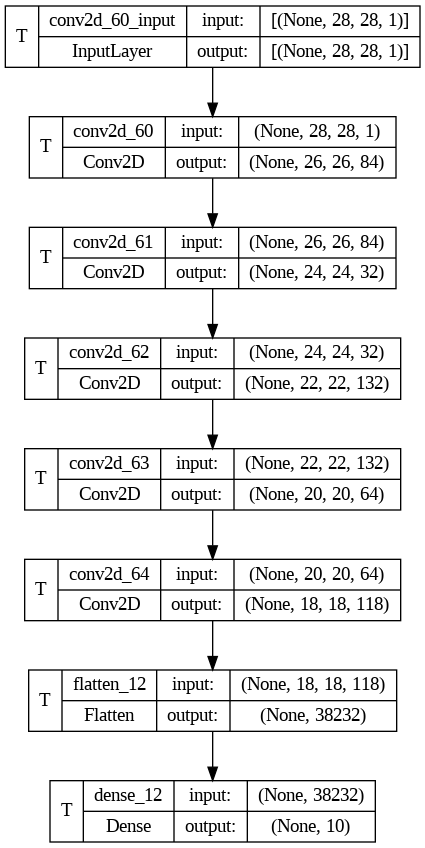

In [110]:
tf.keras.utils.plot_model(model, show_shapes=True, show_trainable=True)

In [111]:
for layer in model.layers:
  print(layer.get_weights())

[array([[[[-7.10664839e-02, -1.42864004e-01, -4.02835980e-02,
           2.58999113e-02, -4.21135426e-02,  9.95636545e-03,
          -6.89801425e-02, -4.94231880e-02,  1.06709503e-01,
          -5.25472462e-02, -1.39422596e-01, -9.31030139e-02,
          -1.09745651e-01, -1.01664871e-01, -1.31126130e-02,
          -1.01643018e-01, -1.85373038e-01, -7.20889717e-02,
          -9.75578129e-02, -8.21356289e-03,  3.30005921e-02,
          -8.25553201e-03, -2.29909066e-02, -5.26634566e-02,
           7.16625806e-03, -2.99762320e-02, -1.17894551e-02,
           2.35181488e-02,  1.32998405e-02,  1.16804997e-02,
          -1.78440176e-02, -9.43940505e-02, -9.75391716e-02,
          -7.14293793e-02, -1.30048081e-01,  1.14733735e-02,
          -2.12218706e-02,  2.18299851e-02, -5.14158644e-02,
          -2.14971472e-02,  9.65356752e-02,  1.64633617e-02,
          -3.73064503e-02,  1.84819587e-02, -2.04968527e-02,
          -7.10174590e-02, -8.55325684e-02, -3.92060727e-02,
           1.51119474e-

In [112]:
b = 8
alpha_q = -2**(b-1)
beta_q = (2**(b-1) - 1)
print(alpha_q)
print(beta_q)
for layer in model.layers:
  #print(layer.name)
  if layer.name!='flatten_12':
    #print("yes")
    #print(layer.get_weights())
    (W,B) = np.array(layer.get_weights())
    #print("bias of", layer.name,B)
    alpha_W = np.min(W)
    beta_W = np.max(W)
    alpha_B = np.min(B)
    beta_B = np.max(B)
    s_W = (beta_W - alpha_W) / (beta_q - alpha_q)
    s_B = (beta_B - alpha_B) / (beta_q - alpha_q)
    z_W = np.round((beta_W*alpha_q - alpha_W*beta_q)/(beta_W - alpha_W))
    z_B = np.round((beta_B*alpha_q - alpha_B*beta_q)/(beta_W - alpha_W))
    #print(W)
    #print(B)
    W1 = np.round(( (W / s_W) + z_W), decimals=0)
    B1 = np.round(( (B / s_B) + z_B), decimals=0)
    #print(W1)
    #print(B1)
    W2 = np.clip(W1, alpha_q, beta_q)
    B2 = np.clip(B1, alpha_q, beta_q)
    #print(W2)
    #print(B2)
    W_quantized = W2.astype('int')
    B_quantized = B2.astype('int')
    #print(W_quantized)
    #print(B_quantized)
    Dist = [W_quantized, B_quantized]
    #print(Dist)
    layer = layer.set_weights(Dist)

-128
127


<ipython-input-112-b6a6b8548d0c>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  (W,B) = np.array(layer.get_weights())


In [113]:
(W,B) = np.array(model.layers[1].get_weights())

<ipython-input-113-f62bcb098c90>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  (W,B) = np.array(model.layers[1].get_weights())


In [114]:
W = W.flatten()
W

array([  4., -22., -10., ...,  20.,   3., -19.], dtype=float32)

In [115]:
B.flatten()
B

array([-128.,  -43., -128.,  -36.,  -33., -122.,  -51.,  -26.,  -36.,
        -24.,  -40.,  -41.,  -69.,    4.,  -26.,    7., -111.,  -21.,
        -26.,   63.,  -26., -128.,   -6.,  -79.,  -82.,   87.,  -80.,
        -30.,  -41.,   -5.,  -51.,   25.], dtype=float32)

In [116]:
with open('weight_data.txt', 'w') as file:
  for layer in model.layers:
    if layer.name!='flatten_12':
      file.write(f"Layer Name: {layer.name}\n")
      file.write(f"Layer Shape: {layer.output_shape}\n")
      (W,B) = np.array(layer.get_weights())
      file.write(f"Layer weights: {W.flatten()}\n")
      file.write(f"Layer bias: {B.flatten()}\n")
      file.write("\n")


<ipython-input-116-a00a2f8c82c0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  (W,B) = np.array(layer.get_weights())
